### Text Analytics Iab1
### Joan Puigdomenech i Joel Romia
### LSA

In [1]:
import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
def tokenize(sentence):
    tokens = nltk.word_tokenize(sentence)
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    tokens2 = [token 
               for token in tokens  if token not in stop_words]
    stems = [ps.stem(token) for token in tokens2 if token.isalpha()]
    return stems

In [9]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
import gensim

In [6]:
reuters=pd.read_csv('Reuters/reuters.txt.gz',sep='\t')
reuters = reuters[reuters.Topic.isin(["cocoa","earn","acq"])]
reuters

,Topic,Content
0,cocoa,showers continued throughout the week in the b...
3,earn,champion products inc said its board of direct...
4,acq,computer terminal systems inc said it has comp...
5,earn,"shr 34 cts vs 1.19 dlrs net 807,000 vs 2,858,0..."
6,earn,"ohio mattress co said its first quarter, endin..."
...,...,...
9513,acq,"gulf and western inc's publishing unit, simon ..."
9514,earn,"shr 52 cts vs 45 cts net 2,623,000 vs 2,256,00..."
9515,earn,"shr 16 cts vs 14 cts net 954,000 vs 777,000 re..."
9516,earn,shr 86 cts vs 74 cts net 11.1 mln vs 8.6 mln r...


In [7]:
print(pd.crosstab(reuters.Topic,columns="Topic").to_string())

col_0  Topic
Topic       
acq     1990
cocoa     55
earn    3563


In [8]:
reuters["tokens"]=reuters.apply(lambda x: tokenize(x.Content),axis=1)
reuters

,Topic,Content,tokens
0,cocoa,showers continued throughout the week in the b...,"[shower, continu, throughout, week, bahia, coc..."
3,earn,champion products inc said its board of direct...,"[champion, product, inc, said, board, director..."
4,acq,computer terminal systems inc said it has comp...,"[comput, termin, system, inc, said, complet, s..."
5,earn,"shr 34 cts vs 1.19 dlrs net 807,000 vs 2,858,0...","[shr, ct, vs, dlr, net, vs, asset, mln, vs, ml..."
6,earn,"ohio mattress co said its first quarter, endin...","[ohio, mattress, co, said, first, quarter, end..."
...,...,...,...
9513,acq,"gulf and western inc's publishing unit, simon ...","[gulf, western, inc, publish, unit, simon, sch..."
9514,earn,"shr 52 cts vs 45 cts net 2,623,000 vs 2,256,00...","[shr, ct, vs, ct, net, vs, nine, mth, shr, dlr..."
9515,earn,"shr 16 cts vs 14 cts net 954,000 vs 777,000 re...","[shr, ct, vs, ct, net, vs, rev, mln, vs, mln, ..."
9516,earn,shr 86 cts vs 74 cts net 11.1 mln vs 8.6 mln r...,"[shr, ct, vs, ct, net, mln, vs, mln, rev, mln,..."


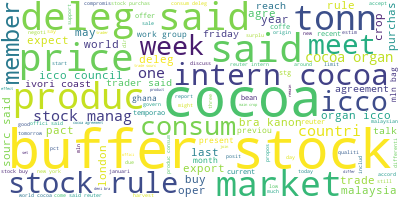

In [16]:
from wordcloud import WordCloud
long_string = ','.join(reuters[reuters.Topic=="cocoa"]['tokens'].sum())
# WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=6, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

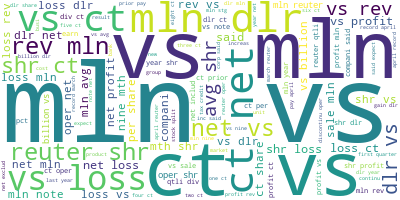

In [17]:
from wordcloud import WordCloud
long_string = ','.join(reuters[reuters.Topic=="earn"]['tokens'].sum())
# WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=6, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

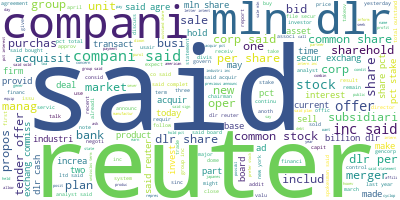

In [18]:
from wordcloud import WordCloud
long_string = ','.join(reuters[reuters.Topic=="acq"]['tokens'].sum())
# WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=6, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(reuters['tokens'])
# Filtro de extremos. Eliminar tokens que aparecen en menos de 10 documentos, más del 30% de documentos , manteniendo los 10000 tokens más frecuentes
id2word.filter_extremes(no_below=10, no_above=0.30, keep_n=5000)# Create Corpus
texts = reuters['tokens']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [11]:
# Train the LSA model
from gensim import models
from pprint import pprint

lsa_model = models.LsiModel(corpus=corpus, id2word=id2word, num_topics=3)
pprint(lsa_model.print_topics())
doc_lda = lsa_model[corpus]

[(0,
  '0.332*"loss" + 0.298*"year" + 0.276*"pct" + 0.259*"profit" + 0.206*"oper" + '
  '0.197*"billion" + 0.169*"bank" + 0.162*"would" + 0.149*"stock" + '
  '0.146*"sale"'),
 (1,
  '-0.679*"loss" + -0.262*"profit" + 0.194*"pct" + -0.193*"rev" + '
  '0.183*"offer" + -0.179*"oper" + 0.163*"stock" + 0.155*"would" + 0.097*"inc" '
  '+ 0.096*"bank"'),
 (2,
  '0.363*"billion" + -0.338*"loss" + 0.326*"bank" + -0.297*"offer" + '
  '-0.288*"stock" + 0.239*"year" + 0.151*"profit" + 0.140*"pct" + -0.130*"inc" '
  '+ -0.127*"would"')]


In [12]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
# Corpus tiene tantas entradas como documentos
print("Documentos: %i" % len(corpus_tfidf))
print("Un documento: %s" % corpus_tfidf[50])


Documentos: 5608
Un documento: [(50, 0.1728285514195821), (98, 0.16101635558464086), (110, 0.1572878071467287), (147, 0.1832246863998495), (279, 0.1947649279552959), (287, 0.22105100510626058), (567, 0.893921898739023)]


In [13]:
lsa_model_tfidf =  models.LsiModel(corpus_tfidf, num_topics=3, id2word=id2word)
for idx, topic in lsa_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.642*"loss" + 0.407*"rev" + 0.361*"profit" + 0.215*"avg" + 0.169*"oper" + 0.155*"mth" + 0.138*"nine" + 0.135*"year" + 0.117*"sale" + 0.107*"note"
Topic: 1 Word: 0.414*"qtli" + 0.401*"div" + 0.379*"april" + 0.361*"record" + 0.356*"pay" + 0.339*"prior" + 0.201*"march" + 0.168*"may" + -0.156*"loss" + 0.092*"payabl"
Topic: 2 Word: 0.604*"rev" + -0.539*"loss" + 0.340*"avg" + 0.275*"mth" + -0.229*"profit" + 0.216*"nine" + 0.159*"billion" + 0.063*"sale" + 0.061*"six" + 0.039*"end"


In [14]:
new_doc = 'wheat exports has rocketed during last century in all countries'
bow_vector = id2word.doc2bow(tokenize(new_doc))
for index, score in sorted(lsa_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lsa_model.print_topic(index, 5)))

Score: 0.0110858886837554	 Topic: 0.332*"loss" + 0.298*"year" + 0.276*"pct" + 0.259*"profit" + 0.206*"oper"
Score: 0.005940724392336532	 Topic: -0.679*"loss" + -0.262*"profit" + 0.194*"pct" + -0.193*"rev" + 0.183*"offer"
Score: 0.0016262571172675614	 Topic: 0.363*"billion" + -0.338*"loss" + 0.326*"bank" + -0.297*"offer" + -0.288*"stock"
